In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def cost(x, y, w, b):
    m = x.shape[0]
    f_x = np.dot(x, w) + b
    cost = np.sum((f_x - y) ** 2)
    cost_final = cost / (2 * m)
    
    return cost_final

In [3]:
def gradient(x, y, w, b):
    
    m,n = x.shape
    f_x = np.dot(x, w) + b
    er = f_x - y
    dj_dw = np.dot(x.T, er) / m
    dj_db = np.sum(er) / m
    
    return dj_dw, dj_db

In [4]:
def grad_dec(no_of_iterations, x, y, w_ini, b_ini, alpha, cost_interval=100):
    
    m = x.shape[0]
    w = w_ini
    b = b_ini
    J = []
    
    for i in range(no_of_iterations):
        
        dj_dw, dj_db = gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i % cost_interval == 0:
            cost_ = cost(x, y, w, b)
            J.append(cost_)
    return w, b, J

In [5]:
def zscore_normalize(X):
    
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_norm = (X - X_mean) / X_std
    
    return X_norm

In [6]:
data = pd.read_csv('linear_train.csv')
Data = zscore_normalize(data)
df = Data.to_numpy()

In [7]:
x_train = df[:, 0:20]
y_train = df[:,20]
n = x_train.shape[1]
w_ini = np.zeros(n)
b = 1
alpha = 0.001

w, b, J = grad_dec(no_of_iterations = 4000, x = x_train, y = y_train, w_ini = w_ini, b_ini = b, alpha = alpha)
print(f"final matrix of w is {w} and final value of b is {b}")

final matrix of w is [0.29031752 0.26401267 0.38789675 0.0066845  0.06912016 0.09896349
 0.28404616 0.12346294 0.08112242 0.37327654 0.15714526 0.1485197
 0.01143508 0.16508648 0.16508648 0.18370915 0.08610921 0.13464844
 0.13372721 0.15698266] and final value of b is 0.018279019827446848


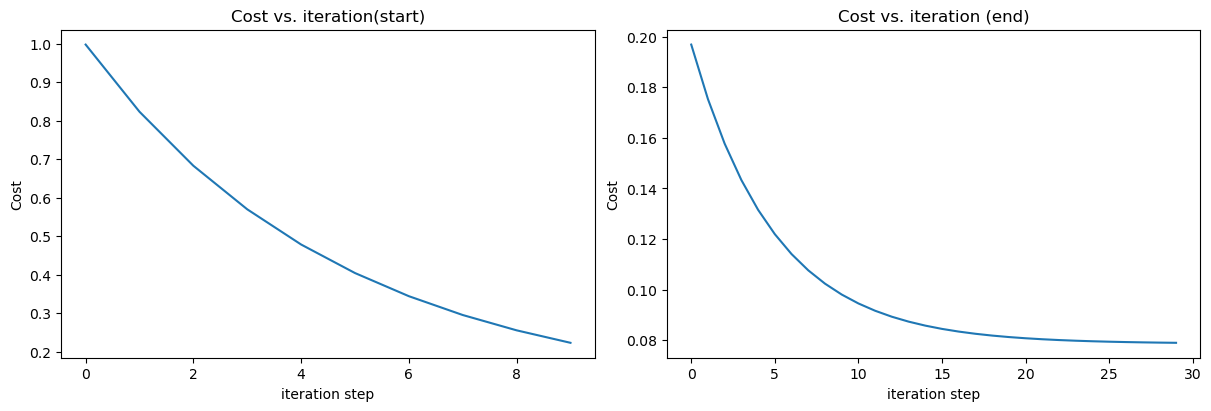

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J[:10])
ax2.plot(np.arange(len(J[10:])), J[10:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [9]:
y_train_out = np.dot(x_train, w) + b
rmse = np.sqrt(np.mean((y_train - y_train_out)**2))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.40


In [10]:
test_data = pd.read_csv('linear_test_data.csv')
test_data = test_data.drop('ids', axis = 1)

Data = zscore_normalize(test_data)
test_df = Data.to_numpy()

In [11]:
x_test = test_df[:, 0:20]

y_test_out = np.dot(x_test, w) + b

print(y_test_out)

[ 0.06888553  0.69985661  0.30501327 ...  0.40765432  1.24274244
 -0.63462298]
